<a href="https://colab.research.google.com/github/GabrielaRomoM/CDS-2025-1/blob/main/PIController.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 29.6 MB/s eta 0:00:00


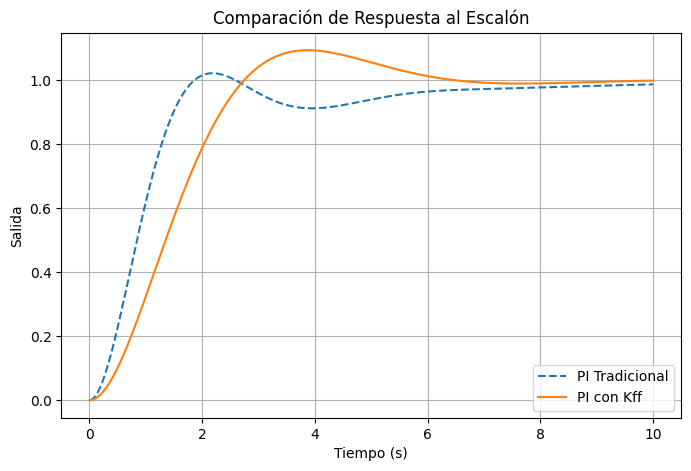

In [ ]:
# Definir la planta H(s) = 0.5 * e^(-s) / (s+1)^2
num_planta = [0.5]  # Numerador sin retardo
den_planta = [1, 2, 1]  # Denominador (s+1)^2 expandido
H = ctl.tf(num_planta, den_planta)

# Parámetros del controlador PI
Kp = 5  # Valor obtenido con Ziegler-Nichols
Ti = 3  # Valor obtenido con Ziegler-Nichols

# Controlador PI tradicional C(s) = Kp(1 + 1/(Ti*s))
num_pi = [Kp * Ti, Kp]  # Kp(Ti*s + 1)
den_pi = [Ti, 0]  # Ti*s
C_pi = ctl.tf(num_pi, den_pi)

# Lazo cerrado con PI tradicional
T_pi = ctl.feedback(C_pi * H, 1)

# Controlador modificado con Kff
Kff = 2 - Kp  # Valor previamente calculado
C_mod = C_pi + Kff  # Añadir realimentación anticipativa
T_mod = ctl.feedback(C_mod * H, 1)

# Simulación de respuesta al escalón
t = np.linspace(0, 10, 1000)  # Tiempo de simulación
t1, y1 = ctl.step_response(T_pi, t)  # Respuesta con PI tradicional
t2, y2 = ctl.step_response(T_mod, t)  # Respuesta con PI + Kff

# Graficar la respuesta al escalón
plt.figure(figsize=(8, 5))
plt.plot(t1, y1, label="PI Tradicional", linestyle="--")
plt.plot(t2, y2, label="PI con Kff", linestyle="-")
plt.xlabel("Tiempo (s)")
plt.ylabel("Salida")
plt.title("Comparación de Respuesta al Escalón")
plt.legend()
plt.grid()
plt.show()


- Kff mejora la respuesta al escalón al proporcionar una acción más directa desde la referencia.
- El PI tradicional tiene un mayor sobreimpulso y oscila más, porque depende solo de la retroalimentación para corregir el error.
- El PI con Kff es más eficiente, ya que la señal de control tiene un componente extra que anticipa la referencia y ayuda a reducir el esfuerzo del controlador PI.
- Kff mejora la respuesta sin afectar la eliminación del error en estado estacionario que aporta el PI
